In [1]:
import numpy as np                   # 2D arrays
import matplotlib.pyplot as plt       # for data visualisation
import pandas as pd                   # reading csv file and turning to dataframe
import seaborn as sns                 # for Data visualisation
import glob
import folium
import re
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime
from shapely.geometry import Point
import geopandas as gpd
from google.cloud import bigquery
import contextily as ctx

# SUICIDE STATS FROM 1950-2021

In [2]:
SR = pd.read_csv(r"C:\Users\micha\Downloads\archive (14)\combined_processed_data.csv")

In [3]:
SR.head()

,Region Name,Country Name,Year,Sex,0 Year,1-4 Years,5-9 Years,10-14 Years,15-19 Years,20-24 Years,...,60-64 Years,65-69 Years,70-74 Years,75-79 Years,80-84 Years,85+ Years,Unknown Age,No of Suicides,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
0,Africa,Cabo Verde,1980,Female,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.227273,0.000000
1,Africa,Cabo Verde,1980,Male,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,0.983156,0.000000
2,Africa,Cabo Verde,2011,Female,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.161273,2.395998
3,Africa,Cabo Verde,2011,Male,0.0,0.0,0.0,3.0,1.0,4.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,37.0,3.804557,28.024735
4,Africa,Egypt,1965,Female,0.0,0.0,0.0,0.0,6.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.026743,0.074515


In [4]:
SR.tail()

,Region Name,Country Name,Year,Sex,0 Year,1-4 Years,5-9 Years,10-14 Years,15-19 Years,20-24 Years,...,60-64 Years,65-69 Years,70-74 Years,75-79 Years,80-84 Years,85+ Years,Unknown Age,No of Suicides,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
9533,Oceania,New Zealand,2014,Male,0.0,0.0,0.0,2.0,27.0,41.0,...,26.0,13.0,14.0,4.0,8.0,10.0,0.0,379.0,10.703106,16.744376
9534,Oceania,New Zealand,2015,Female,0.0,0.0,0.0,4.0,25.0,16.0,...,12.0,7.0,3.0,4.0,1.0,1.0,0.0,144.0,8.828921,5.458483
9535,Oceania,New Zealand,2015,Male,0.0,0.0,0.0,5.0,32.0,38.0,...,24.0,14.0,7.0,13.0,9.0,6.0,0.0,386.0,11.143815,16.703400
9536,Oceania,New Zealand,2016,Female,0.0,0.0,0.0,3.0,10.0,16.0,...,4.0,5.0,3.0,2.0,2.0,2.0,0.0,145.0,8.362872,5.342887
9537,Oceania,New Zealand,2016,Male,0.0,0.0,0.0,5.0,34.0,52.0,...,23.0,18.0,5.0,10.0,8.0,10.0,0.0,416.0,11.974208,17.383315


In [5]:
SR.duplicated().sum()

0

In [6]:
SR.isna().isnull().sum()

Region Name                                                0
Country Name                                               0
Year                                                       0
Sex                                                        0
0 Year                                                     0
1-4 Years                                                  0
5-9 Years                                                  0
10-14 Years                                                0
15-19 Years                                                0
20-24 Years                                                0
25-29 Years                                                0
30-34 Years                                                0
35-39 Years                                                0
40-44 Years                                                0
45-49 Years                                                0
50-54 Years                                                0
55-59 Years             

In [7]:
SR.fillna("NaN", inplace=True)

In [8]:
Region = SR["Region Name"].value_counts()
print(Region)

Europe                             3825
Central and South America          1809
Asia                               1752
North America and the Caribbean    1515
Africa                              337
Oceania                             300
Name: Region Name, dtype: int64


In [9]:
Country = SR["Country Name"].value_counts()
print(Country)

Mexico                      146
Japan                       142
Spain                       142
Australia                   142
United States of America    142
                           ... 
Iraq                          6
Lebanon                       6
Sao Tome and Principe         6
United Arab Emirates          6
Cabo Verde                    4
Name: Country Name, Length: 118, dtype: int64


In [10]:
Sex = SR["Sex"].value_counts()
print(Sex)

Female     4721
Male       4721
Unknown      96
Name: Sex, dtype: int64


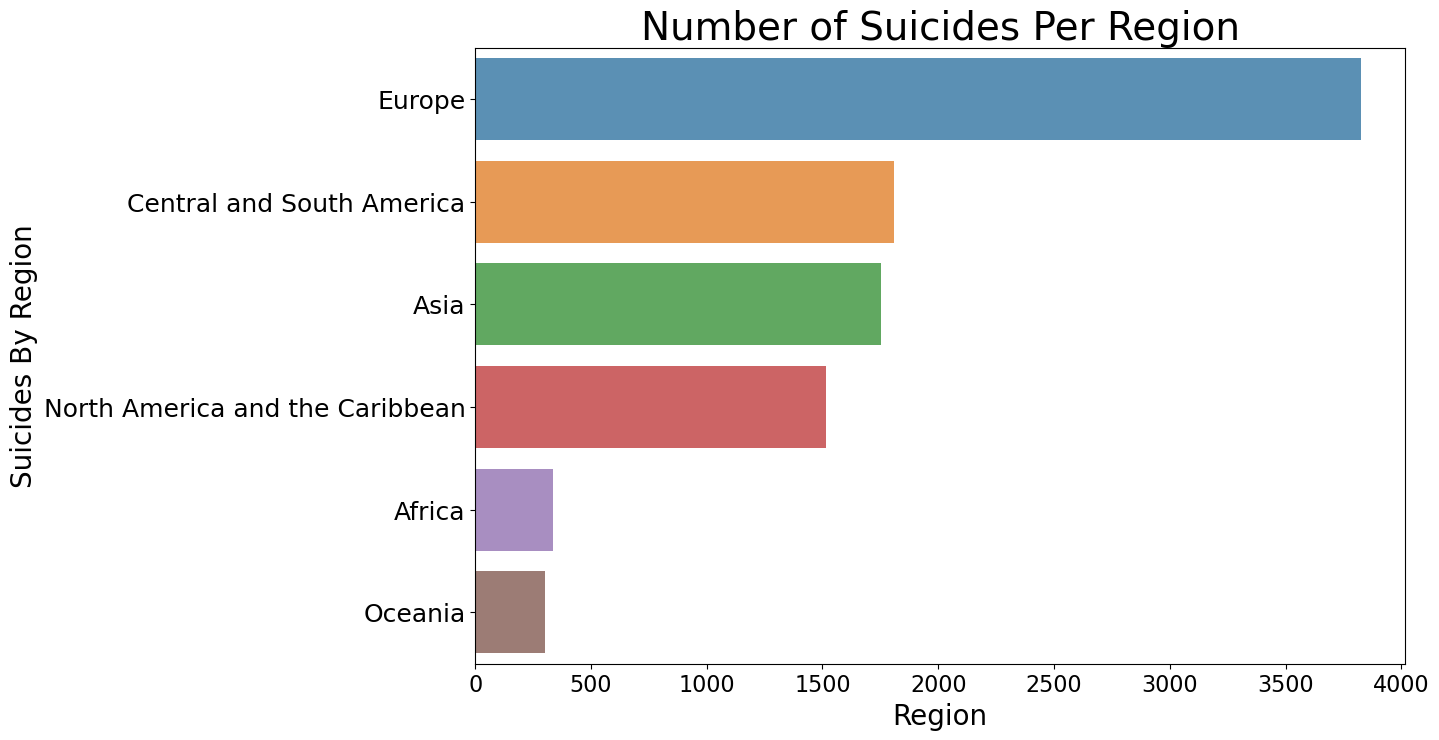

In [11]:
# Graph to show the age ranges of participants
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(y=Region.index,x=Region.values,alpha=0.8)
ax.set_title("Number of Suicides Per Region",fontsize=28)
ax.set_xlabel("Region",fontsize=20)
ax.set_ylabel("Suicides By Region",fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=16)

plt.show()

In [12]:
SR.columns

Index(['Region Name', 'Country Name', 'Year', 'Sex', '0 Year', '1-4 Years',
       '5-9 Years', '10-14 Years', '15-19 Years', '20-24 Years', '25-29 Years',
       '30-34 Years', '35-39 Years', '40-44 Years', '45-49 Years',
       '50-54 Years', '55-59 Years', '60-64 Years', '65-69 Years',
       '70-74 Years', '75-79 Years', '80-84 Years', '85+ Years', 'Unknown Age',
       'No of Suicides',
       'Percentage of cause-specific deaths out of total deaths',
       'Death rate per 100 000 population'],
      dtype='object')

In [13]:
SR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 27 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Region Name                                              9538 non-null   object 
 1   Country Name                                             9538 non-null   object 
 2   Year                                                     9538 non-null   int64  
 3   Sex                                                      9538 non-null   object 
 4   0 Year                                                   9538 non-null   float64
 5   1-4 Years                                                9538 non-null   float64
 6   5-9 Years                                                9538 non-null   float64
 7   10-14 Years                                              9538 non-null   float64
 8   15-19 Years                 

# FROM THE MAX YEAR 2021, SUICIDES BY AGE GROUPS

In [14]:
SR["Year"].max()

2021

In [15]:
data_latest_year = SR[SR['Year'] == SR['Year'].max()]

In [16]:
Years_10_14 = data_latest_year.filter(like="10-14 Years").sum()
Years_15_19 = data_latest_year.filter(like="15-19 Years").sum()
Years_20_24 = data_latest_year.filter(like="20-24 Years").sum()
Years_25_29 = data_latest_year.filter(like="25-29 Years").sum()
Years_30_34 = data_latest_year.filter(like="30-34 Years").sum()
Years_35_39 = data_latest_year.filter(like="35-39 Years").sum()
Years_40_44 = data_latest_year.filter(like="40-44 Years").sum()
Years_45_49 = data_latest_year.filter(like="45-49 Years").sum()
Years_50_54 = data_latest_year.filter(like="50-54 Years").sum()
Years_55_54 = data_latest_year.filter(like="55-59 Years").sum()
Years_60_64 = data_latest_year.filter(like="60-64 Years").sum()
Years_65_69 = data_latest_year.filter(like="65-69 Years").sum()
Years_70_74 = data_latest_year.filter(like="70-74 Years").sum()
Years_75_79 = data_latest_year.filter(like="75-79 Years").sum()
Years_80_84 = data_latest_year.filter(like="80-84 Years").sum()
Years_85_plus = data_latest_year.filter(like="85+ Years").sum()

In [17]:
labels = ["10-14 Years", "15-19 Years", "20-24 Years","25-29 Years","30-34 Years","35-39 Years","40-44 Years","45-49 Years",
         "50-54 Years","55-59 Years","60-64 Years","65-69 Years","70-74 Years","75-79 Years","80-84 Years","85+ Years"]
totals = [Years_10_14.sum(), Years_15_19.sum(), Years_20_24.sum(), Years_25_29.sum(), Years_30_34.sum(), Years_35_39.sum(), Years_40_44.sum(), Years_45_49.sum(),
         Years_50_54.sum(), Years_55_54.sum(), Years_60_64.sum(), Years_65_69.sum(), Years_70_74.sum(),Years_75_79.sum(), Years_80_84.sum(), Years_85_plus.sum()]

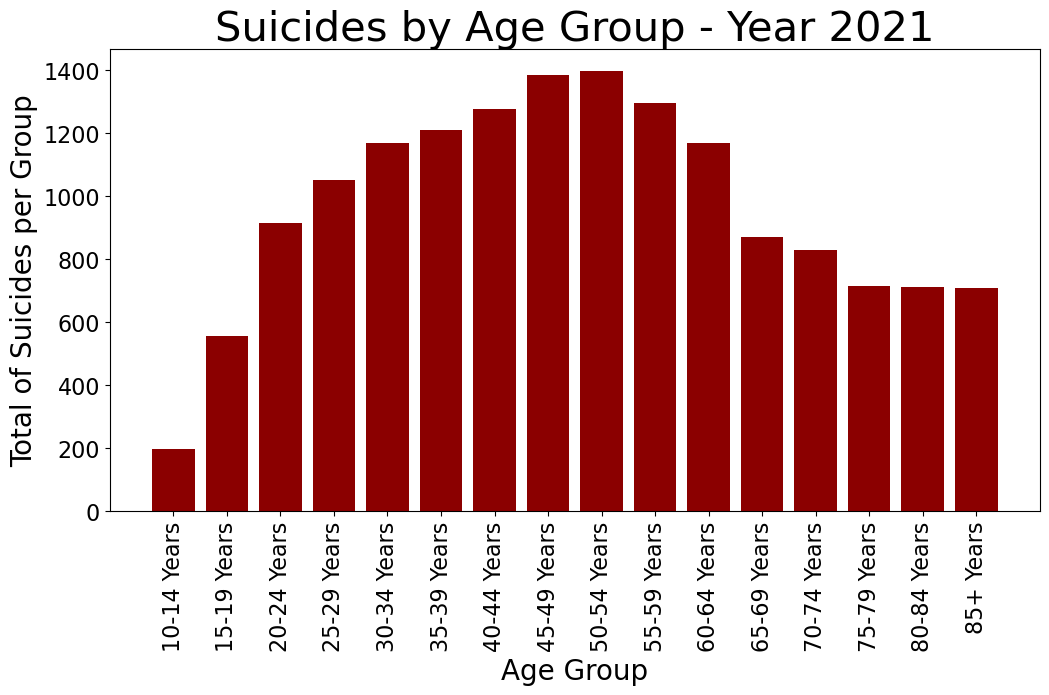

In [18]:
# Histogram to see distribution across age groups
plt.figure(figsize=(12,6))
plt.bar(labels, totals, color='darkred')
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Total of Suicides per Group', fontsize=20)
plt.title('Suicides by Age Group - Year 2021', fontsize=30)
plt.xticks(rotation=90)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

# FROM THE MIN YEAR 1950, SUICIDES BY AGE GROUPS

In [19]:
SR["Year"].min()

1950

In [20]:
min_year = SR[SR['Year'] == SR['Year'].min()]

In [21]:
Years_10_14 = min_year.filter(like="10-14 Years").sum()
Years_15_19 = min_year.filter(like="15-19 Years").sum()
Years_20_24 = min_year.filter(like="20-24 Years").sum()
Years_25_29 = min_year.filter(like="25-29 Years").sum()
Years_30_34 = min_year.filter(like="30-34 Years").sum()
Years_35_39 = min_year.filter(like="35-39 Years").sum()
Years_40_44 = min_year.filter(like="40-44 Years").sum()
Years_45_49 = min_year.filter(like="45-49 Years").sum()
Years_50_54 = min_year.filter(like="50-54 Years").sum()
Years_55_54 = min_year.filter(like="55-59 Years").sum()
Years_60_64 = min_year.filter(like="60-64 Years").sum()
Years_65_69 = min_year.filter(like="65-69 Years").sum()
Years_70_74 = min_year.filter(like="70-74 Years").sum()
Years_75_79 = min_year.filter(like="75-79 Years").sum()
Years_80_84 = min_year.filter(like="80-84 Years").sum()
Years_85_plus = min_year.filter(like="85+ Years").sum()

In [22]:
labels = ["10-14 Years", "15-19 Years", "20-24 Years","25-29 Years","30-34 Years","35-39 Years","40-44 Years","45-49 Years",
         "50-54 Years","55-59 Years","60-64 Years","65-69 Years","70-74 Years","75-79 Years","80-84 Years","85+ Years"]
totals = [Years_10_14.sum(), Years_15_19.sum(), Years_20_24.sum(), Years_25_29.sum(), Years_30_34.sum(), Years_35_39.sum(), Years_40_44.sum(), Years_45_49.sum(),
         Years_50_54.sum(), Years_55_54.sum(), Years_60_64.sum(), Years_65_69.sum(), Years_70_74.sum(),Years_75_79.sum(), Years_80_84.sum(), Years_85_plus.sum()]

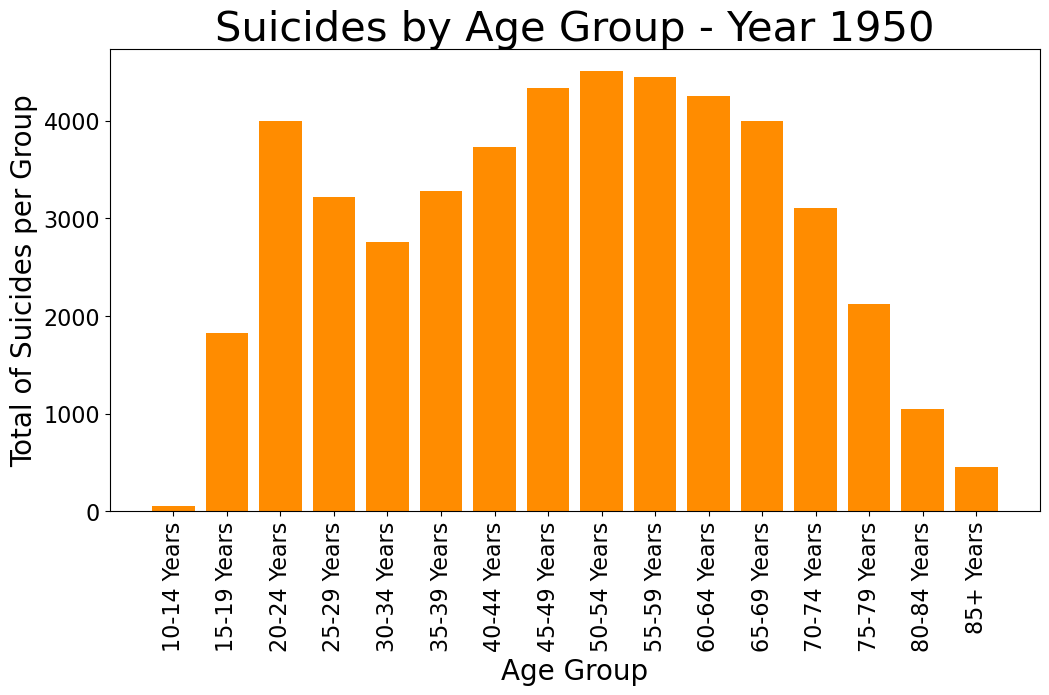

In [23]:
# Histogram to see distribution across age groups
plt.figure(figsize=(12,6))
plt.bar(labels, totals, color='darkorange')
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Total of Suicides per Group', fontsize=20)
plt.title('Suicides by Age Group - Year 1950', fontsize=30)
plt.xticks(rotation=90)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

# FROM THE  YEAR 2000, SUICIDES BY AGE GROUPS

In [24]:
year_200_rows = SR[SR["Year"] == 2000]

In [25]:
Years_10_14 = year_200_rows.filter(like="10-14 Years").sum()
Years_15_19 = year_200_rows.filter(like="15-19 Years").sum()
Years_20_24 = year_200_rows.filter(like="20-24 Years").sum()
Years_25_29 = year_200_rows.filter(like="25-29 Years").sum()
Years_30_34 = year_200_rows.filter(like="30-34 Years").sum()
Years_35_39 = year_200_rows.filter(like="35-39 Years").sum()
Years_40_44 = year_200_rows.filter(like="40-44 Years").sum()
Years_45_49 = year_200_rows.filter(like="45-49 Years").sum()
Years_50_54 = year_200_rows.filter(like="50-54 Years").sum()
Years_55_54 = year_200_rows.filter(like="55-59 Years").sum()
Years_60_64 = year_200_rows.filter(like="60-64 Years").sum()
Years_65_69 = year_200_rows.filter(like="65-69 Years").sum()
Years_70_74 = year_200_rows.filter(like="70-74 Years").sum()
Years_75_79 = year_200_rows.filter(like="75-79 Years").sum()
Years_80_84 = year_200_rows.filter(like="80-84 Years").sum()
Years_85_plus = year_200_rows.filter(like="85+ Years").sum()

In [26]:
labels = ["10-14 Years", "15-19 Years", "20-24 Years","25-29 Years","30-34 Years","35-39 Years","40-44 Years","45-49 Years",
         "50-54 Years","55-59 Years","60-64 Years","65-69 Years","70-74 Years","75-79 Years","80-84 Years","85+ Years"]
totals = [Years_10_14.sum(), Years_15_19.sum(), Years_20_24.sum(), Years_25_29.sum(), Years_30_34.sum(), Years_35_39.sum(), Years_40_44.sum(), Years_45_49.sum(),
         Years_50_54.sum(), Years_55_54.sum(), Years_60_64.sum(), Years_65_69.sum(), Years_70_74.sum(),Years_75_79.sum(), Years_80_84.sum(), Years_85_plus.sum()]

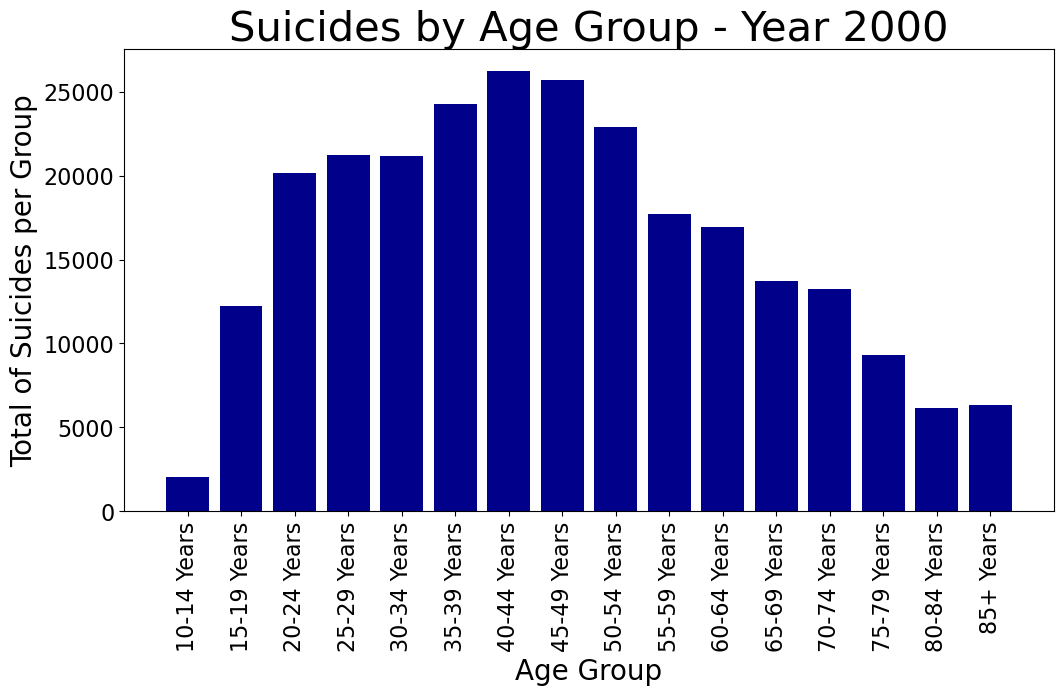

In [27]:
# Histogram to see distribution across age groups
plt.figure(figsize=(12,6))
plt.bar(labels, totals, color='darkblue')
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Total of Suicides per Group', fontsize=20)
plt.title('Suicides by Age Group - Year 2000', fontsize=30)
plt.xticks(rotation=90)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

   # AGE GROUPS BY REGIONS 

In [28]:
# grouping by Type, will use for many different age categories
grouped = SR.groupby('Region Name')['10-14 Years'].sum()

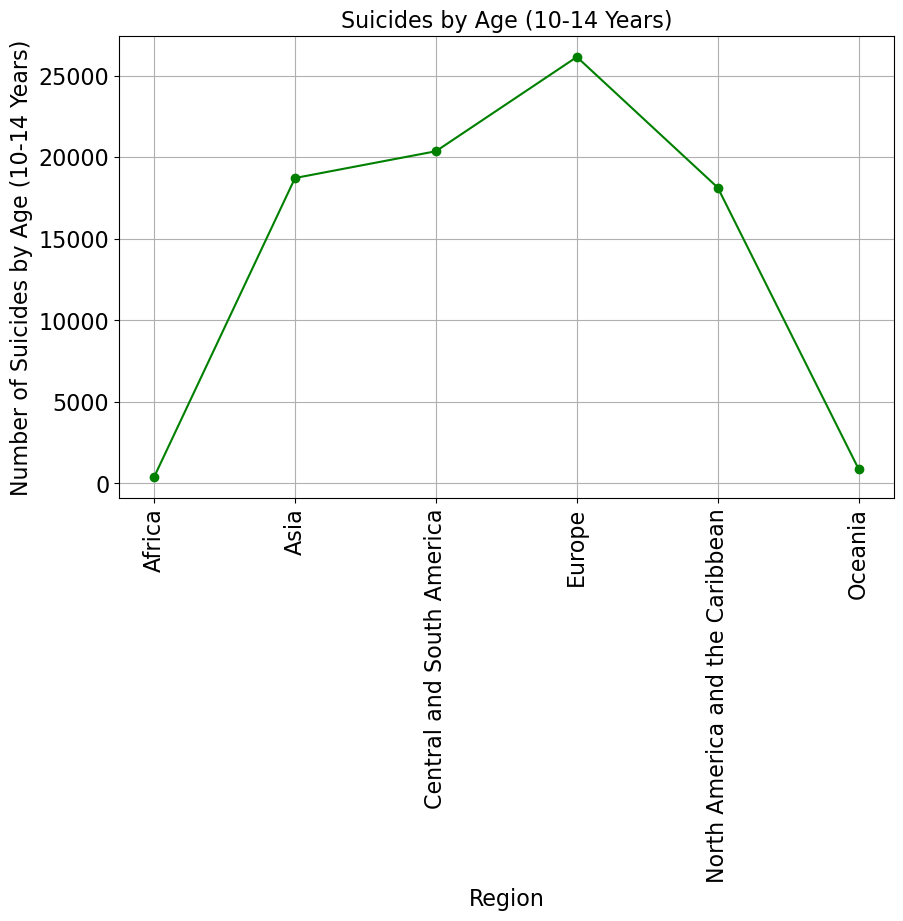

In [29]:
# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='g')
plt.xlabel('Region', fontsize=16)
plt.ylabel('Number of Suicides by Age (10-14 Years)', fontsize=16)
plt.title('Suicides by Age (10-14 Years)', fontsize=16)
plt.xticks(rotation=90)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

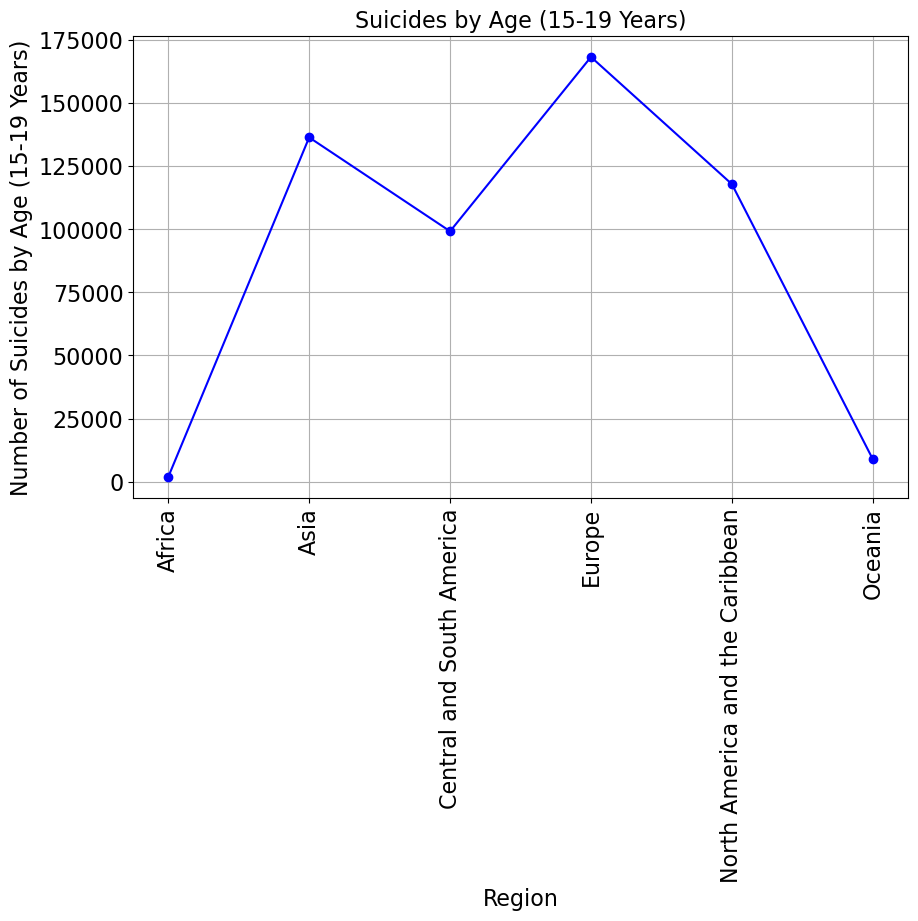

In [30]:
# grouping by Type, will use for many different age categories
grouped = SR.groupby('Region Name')['15-19 Years'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='b')
plt.xlabel('Region', fontsize=16)
plt.ylabel('Number of Suicides by Age (15-19 Years)', fontsize=16)
plt.title('Suicides by Age (15-19 Years)', fontsize=16)
plt.xticks(rotation=90)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

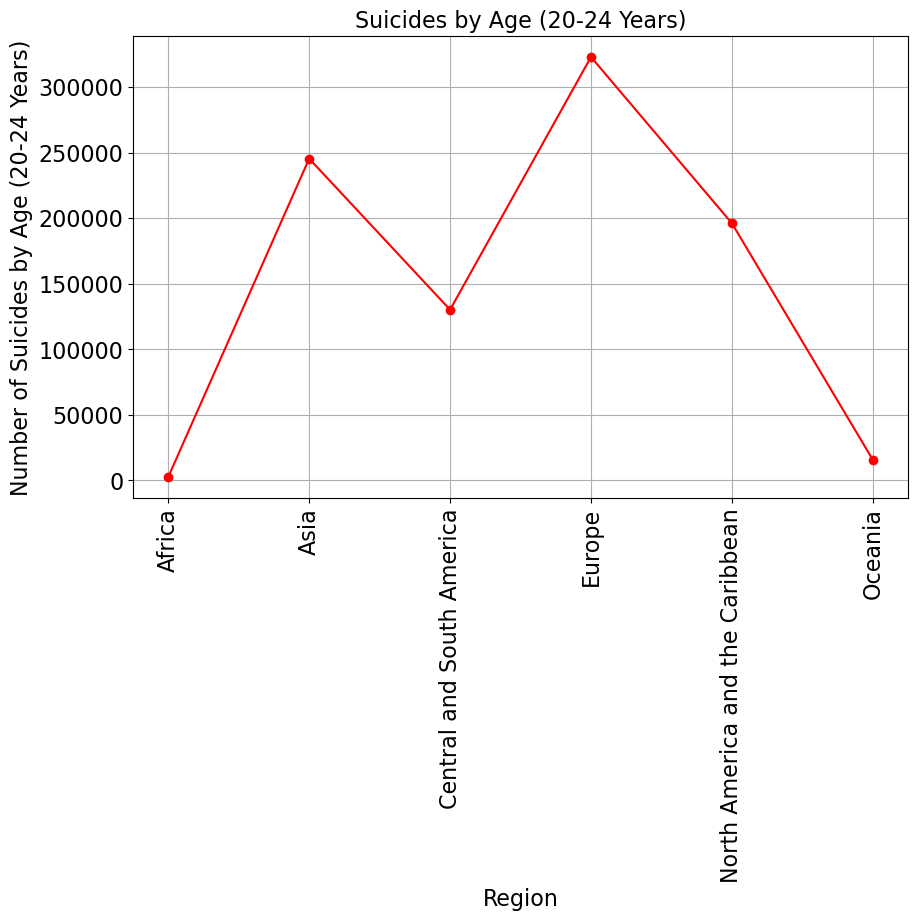

In [31]:
# grouping by Type, will use for many different age categories
grouped = SR.groupby('Region Name')['20-24 Years'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='r')
plt.xlabel('Region', fontsize=16)
plt.ylabel('Number of Suicides by Age (20-24 Years)', fontsize=16)
plt.title('Suicides by Age (20-24 Years)', fontsize=16)
plt.xticks(rotation=90)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

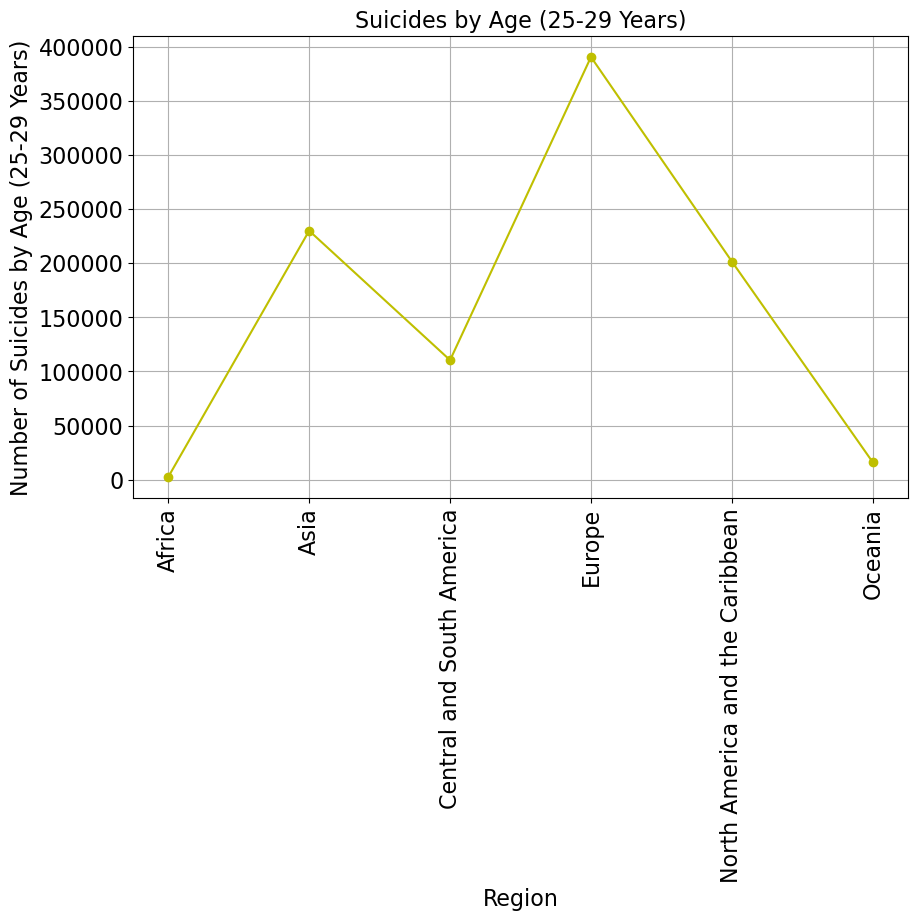

In [32]:
# grouping by Type, will use for many different age categories
grouped = SR.groupby('Region Name')['25-29 Years'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='y')
plt.xlabel('Region', fontsize=16)
plt.ylabel('Number of Suicides by Age (25-29 Years)', fontsize=16)
plt.title('Suicides by Age (25-29 Years)', fontsize=16)
plt.xticks(rotation=90)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

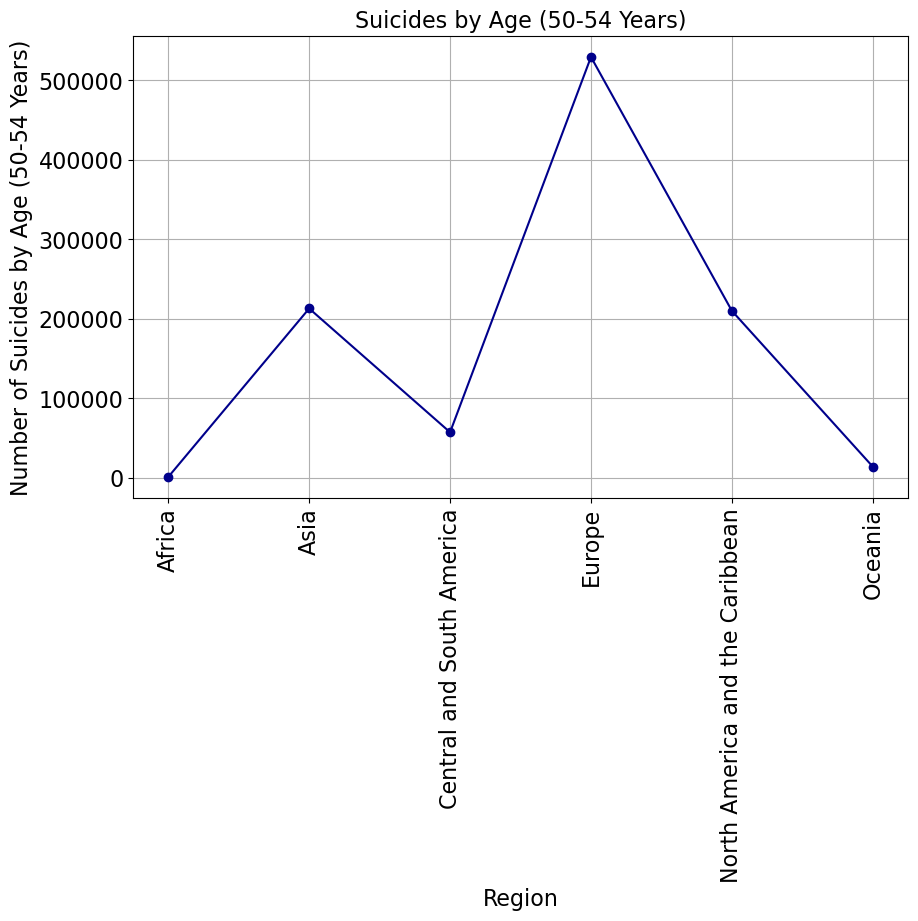

In [33]:
# grouping by Type, will use for many different age categories
grouped = SR.groupby('Region Name')['50-54 Years'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='darkblue')
plt.xlabel('Region', fontsize=16)
plt.ylabel('Number of Suicides by Age (50-54 Years)', fontsize=16)
plt.title('Suicides by Age (50-54 Years)', fontsize=16)
plt.xticks(rotation=90)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

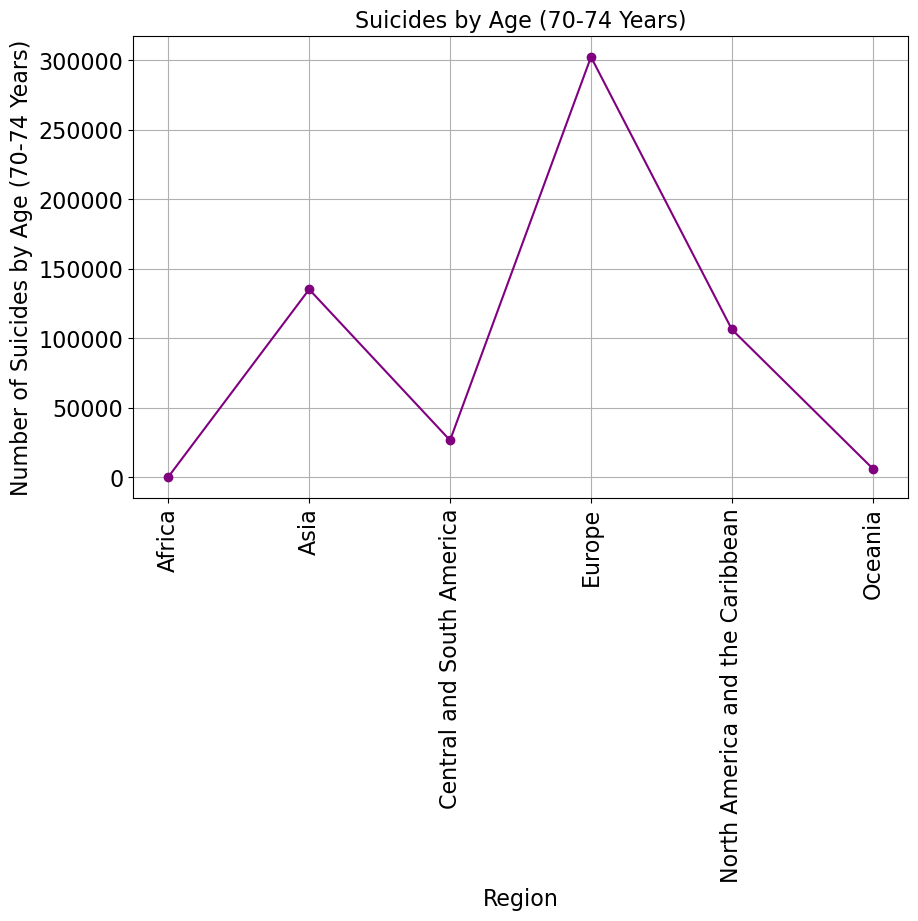

In [34]:
# grouping by Type, will use for many different age categories
grouped = SR.groupby('Region Name')['70-74 Years'].sum()

# Using a line plot of visualise
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values, marker='o', color='purple')
plt.xlabel('Region', fontsize=16)
plt.ylabel('Number of Suicides by Age (70-74 Years)', fontsize=16)
plt.title('Suicides by Age (70-74 Years)', fontsize=16)
plt.xticks(rotation=90)
plt.grid()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

# SUICIDES BY COUNTRY (MOST-LEAST)

In [35]:
Country_table = SR["Country Name"].value_counts()  
Gender_table = SR["Sex"].value_counts() 
print(Country_table)
print(Gender_table)

Mexico                      146
Japan                       142
Spain                       142
Australia                   142
United States of America    142
                           ... 
Iraq                          6
Lebanon                       6
Sao Tome and Principe         6
United Arab Emirates          6
Cabo Verde                    4
Name: Country Name, Length: 118, dtype: int64
Female     4721
Male       4721
Unknown      96
Name: Sex, dtype: int64


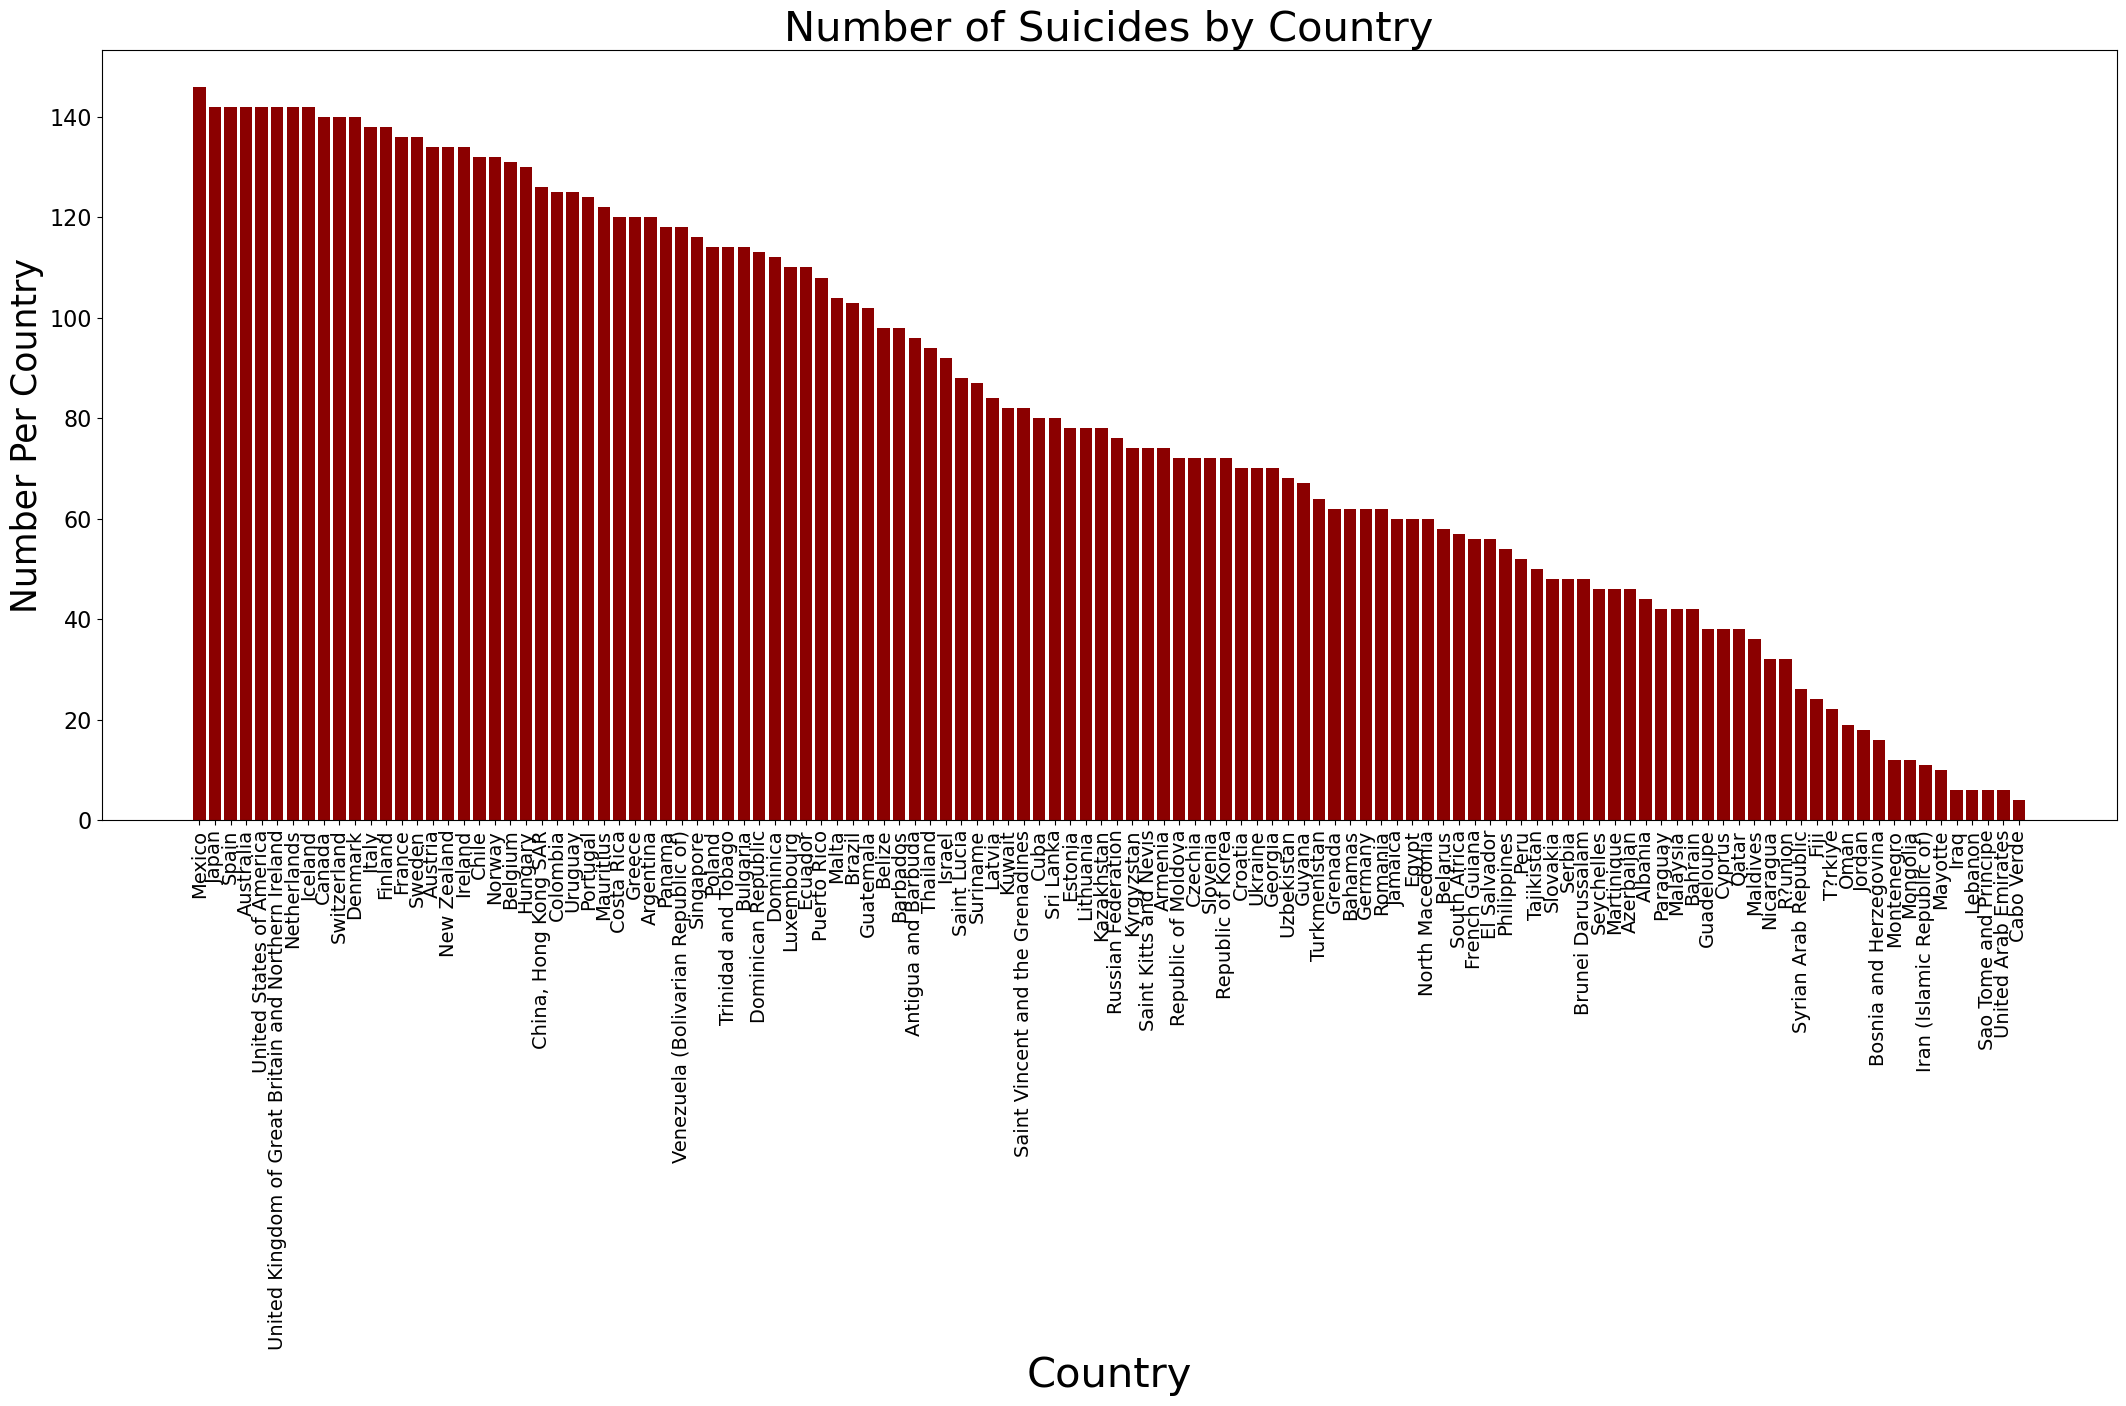

In [36]:
# Returning count values to lists 
regions = Country_table.index.tolist()  
counts = Country_table.values.tolist()   

# frequency count of states in each region displayed in a table.
plt.figure(figsize=(26,10))
plt.bar(regions,counts, color='darkred')
plt.title("Number of Suicides by Country",fontsize=30)
plt.xlabel("Country",fontsize=30)
plt.xticks(rotation=90)
plt.ylabel("Number Per Country",fontsize=25)
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
plt.show()         
# Results show that South Athlanic has the largest number of State incidents of all regions

# TRENDS IN RATES OVER THE YEARS

In [37]:
Country_year = SR.groupby('Year')['No of Suicides'].sum()
print(Country_year)

Year
1950     47275.0
1951     53484.0
1952     54313.0
1953     57621.0
1954     62780.0
          ...   
2017    220697.0
2018    214433.0
2019    207755.0
2020    155148.0
2021     15475.0
Name: No of Suicides, Length: 72, dtype: float64


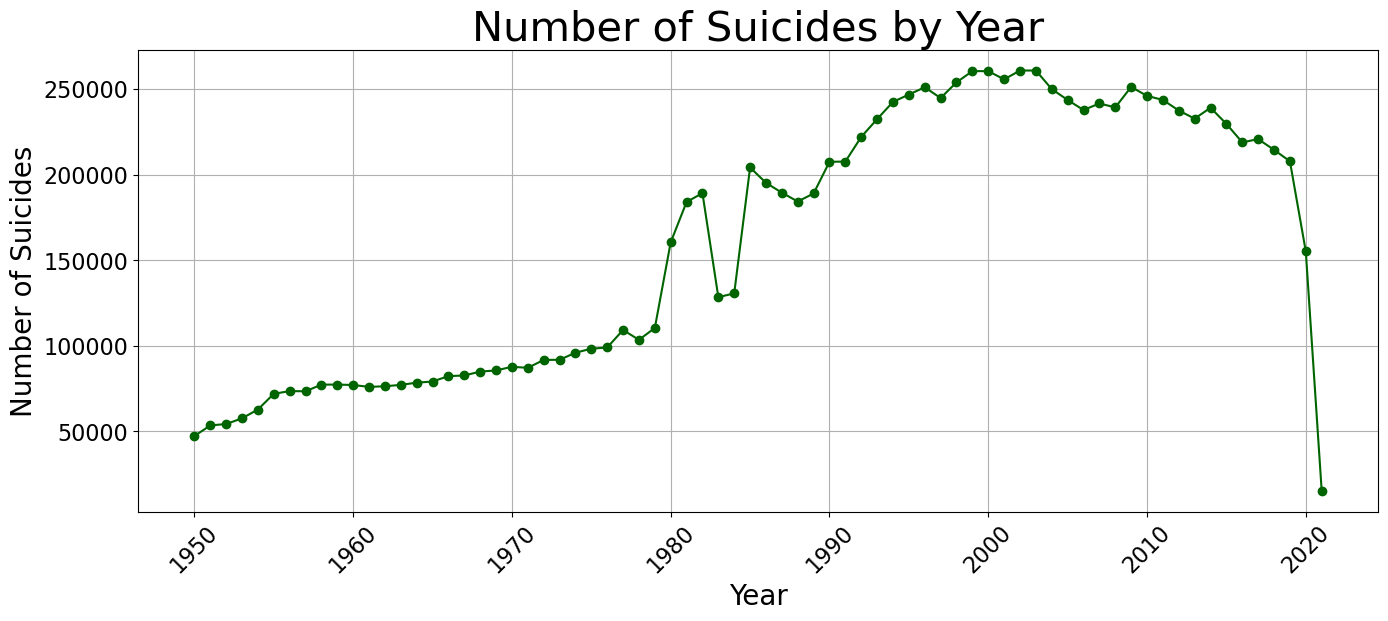

In [38]:
# Line plot
plt.figure(figsize=(16, 6))
plt.plot(Country_year.index, Country_year.values, marker='o', color='darkgreen')
plt.title('Number of Suicides by Year',fontsize=30)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number of Suicides',fontsize=20)
plt.xticks(rotation=45)
plt.grid(True)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()